<a href="https://colab.research.google.com/github/mcurry572/4540/blob/main/Michael_Curry_Probability_Noise_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import useful libraries

In [71]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt

## (i) Probability distributions

Use *scipy.stats* module to work on different probability distributions. Use documentation [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

#### 1. Bernoulli - an example of discrete distribution

In [72]:
dist_bernoulli = st.bernoulli # create an object for Bernoulli distribution
p = 0.3 # specify the shape parameter of a Bernoulli distribution
x = dist_bernoulli.rvs(p, size=1000) # generate 1000 random samples from the Bernoulli distribution

# evluate the probability mass function (pmf) at 0 and 1
xs = np.array([0, 1]) # posible values
pmf_bernoulli = dist_bernoulli.pmf(xs, p) # pmf with parameter p at xs

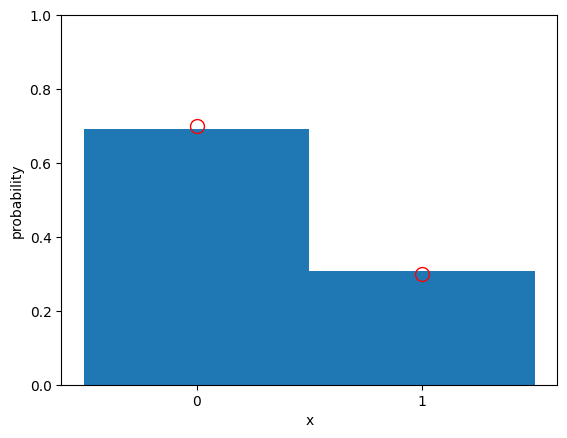

In [73]:
plt.figure()
# plot histogram of the relative frequency of 0's and 1's
plt.hist(x, bins=xs.size, range=(xs[0]-.5, xs[-1]+.5), density=True)

# plot pmf with red circles
plt.plot(xs, pmf_bernoulli, 'ro', markersize=10, markerfacecolor='None')

plt.xticks(xs)
plt.ylim([0, 1])
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

2. Uniform Distribution

In [74]:
# Define Uniform Distribution
a, b = 0, 10  # Lower and upper bounds
x = np.random.uniform(a, b, 1000)  # Generate 1000 random samples

# Compute PDF
xs = np.linspace(a, b, 1000)
pdf_uniform = st.uniform.pdf(xs, loc=a, scale=b-a)


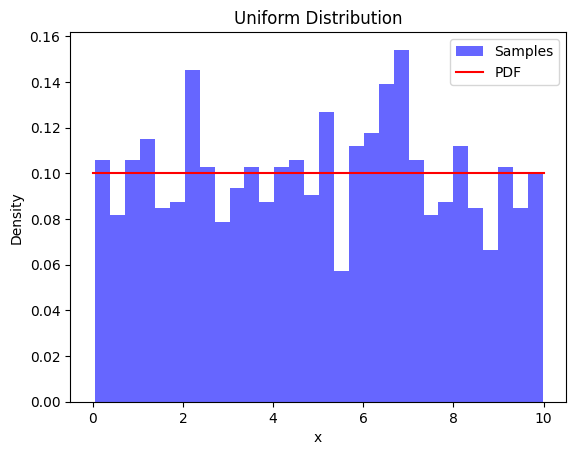

In [75]:
# Plot histogram
plt.figure()
plt.hist(x, bins=30, density=True, alpha=0.6, color='b', label="Samples")

# Plot pmf
plt.plot(xs, pdf_uniform, 'r-', label="PMF")

plt.xlabel('x')
plt.ylabel('Density')
plt.title("Uniform Distribution")
plt.legend()
plt.show()

3. Poisson Distribution

In [76]:
# Define Poisson Distribution
λ = 4  # Average rate of occurrences
x = st.poisson.rvs(mu=λ, size=1000)  # Generate 1000 random samples

# Compute PMF
xs = np.arange(0, max(x) + 1)
pmf_poisson = st.poisson.pmf(xs, mu=λ)

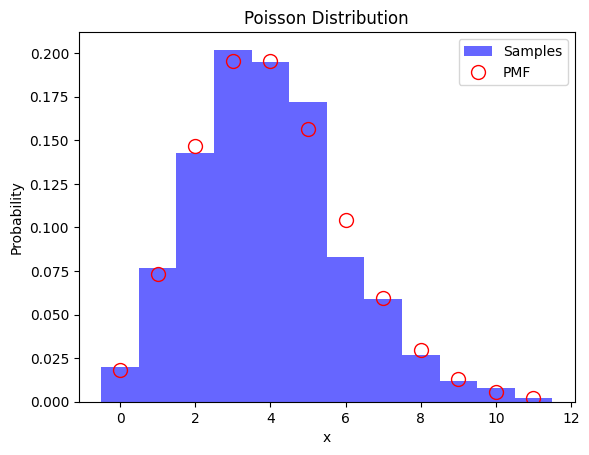

In [77]:
# Plot histogram
plt.figure()
plt.hist(x, bins=np.arange(0, max(x) + 1.5) - 0.5, density=True, alpha=0.6, color='b', label="Samples")

# Plot theoretical PMF with red circles
plt.plot(xs, pmf_poisson, 'ro', markersize=10, markerfacecolor='None', label="PMF")

plt.xlabel('x')
plt.ylabel('Probability')
plt.title("Poisson Distribution")
plt.legend()
plt.show()


#### 4. Gaussian - an example of continuous distribution

In [78]:
# Define Normal Distribution
mu, sigma = 0, 1  # Mean and standard deviation
x = np.random.normal(mu, sigma, 1000)  # Generate 1000 random samples

# Compute PMF
xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf_gaussian = st.norm.pdf(xs, loc=mu, scale=sigma)

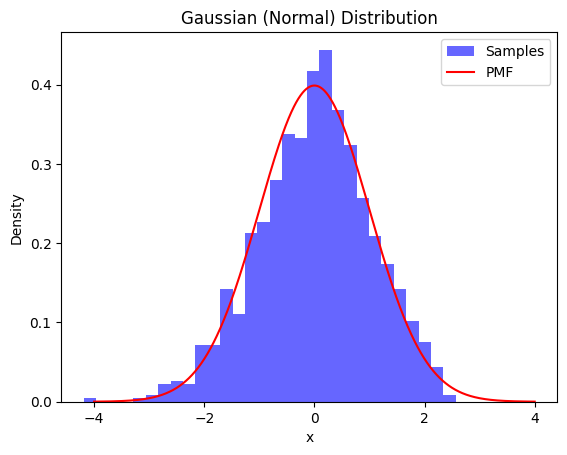

In [79]:
# Plot histogram
plt.figure()
plt.hist(x, bins=30, density=True, alpha=0.6, color='b', label="Samples")

# Plot theoretical PMF
plt.plot(xs, pdf_gaussian, 'r-', label="PMF")

plt.xlabel('x')
plt.ylabel('Density')
plt.title("Gaussian (Normal) Distribution")
plt.legend()
plt.show()

5. Log-normal distribution

In [80]:
# Define Log-Normal Distribution
shape = 0.5  # Shape parameter
scale = np.exp(1)  # Scale parameter
x = st.lognorm.rvs(s=shape, scale=scale, size=1000)  # Generate 1000 random samples

# Compute PDF
xs = np.linspace(min(x), max(x), 1000)
pdf_lognorm = st.lognorm.pdf(xs, s=shape, scale=scale)

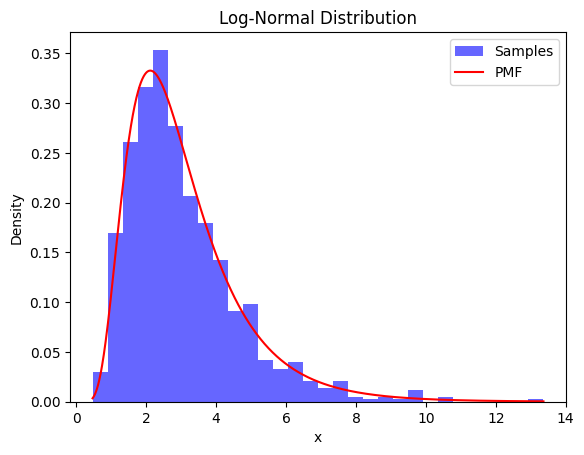

In [81]:
# Plot histogram
plt.figure()
plt.hist(x, bins=30, density=True, alpha=0.6, color='b', label="Samples")

# Plot theoretical PDF
plt.plot(xs, pdf_lognorm, 'r-', label="PMF")

plt.xlabel('x')
plt.ylabel('Density')
plt.title("Log-Normal Distribution")
plt.legend()
plt.show()

## (ii) Time series of noise

What is [Colored noise](https://en.wikipedia.org/wiki/Colors_of_noise)?

Specify properties of the time series

In [82]:
fs = 1000 # 1000 Hz sampling frequency of time series
N = 10000 # length of the time series (10 sec)
t = np.arange(N) / fs * 1000 # time points in ms

#### White noise

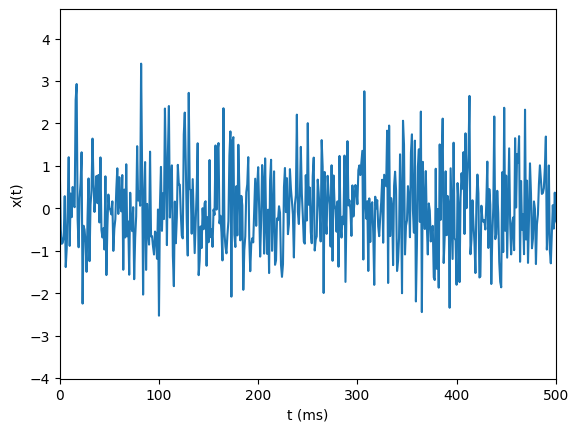

In [83]:
white_noise = dist_norm.rvs(size=N) # draw from standard Gaussian distribution

plt.figure()
plt.plot(t, white_noise)
plt.xlim([0, 500]) # show the first 500 ms
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Brownian noise (random walk)

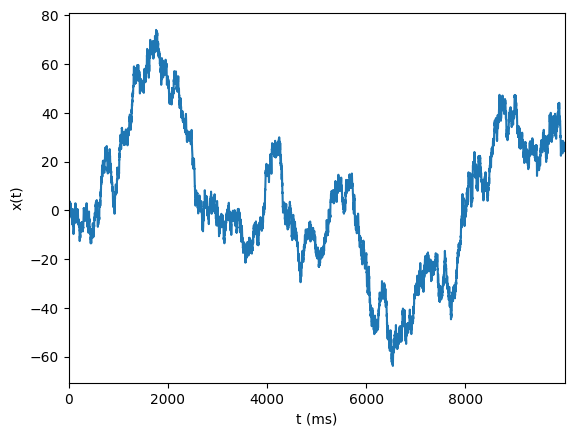

In [84]:
brownian_noise = np.cumsum(white_noise) # summing up white noise

plt.figure()
plt.plot(t, brownian_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Pink noise

In [85]:
# install the package
%pip install colorednoise

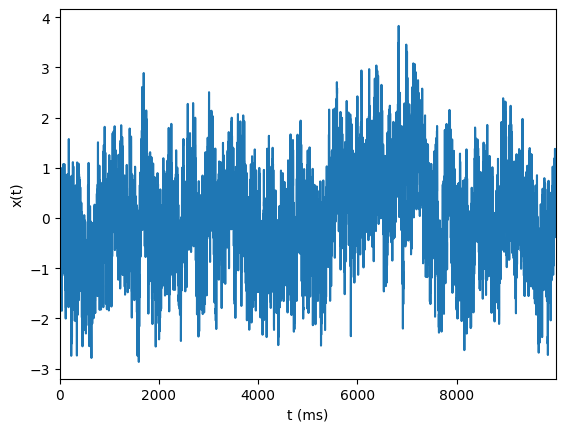

In [86]:
import colorednoise as cn
beta = 1 # set the exponent of 1/f^beta power spectrum (0<beta<2)
pink_noise = cn.powerlaw_psd_gaussian(beta, N)

plt.figure()
plt.plot(t, pink_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

## (iii) Power spectral density (PSD)

Use *scipy.signal.periodogram* and *scipy.signal.welch* to estimate PSD. Use documentation [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html).

White noise has constant power spectrum. Brownian noise has $1/f^2$ PSD. Pink noise has $1/f^\beta$ PSD, $0<\beta<2$.

#### Using pink noise for example

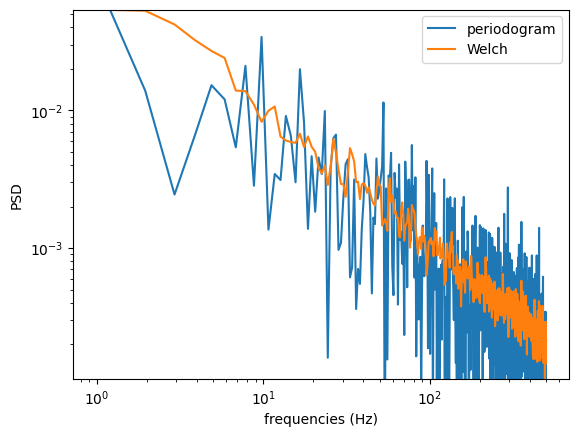

In [87]:
nperseg = 1024 # set length of each segment to 1024 (1024 ms with 1000 Hz sampling rate)

# Estimate PSD using periodogram (Bartlett's method)
f1, pxx1 = signal.periodogram(pink_noise, fs=fs, nfft=nperseg)

# Estimate PSD using Welch's method
f2, pxx2 = signal.welch(pink_noise, fs=fs, nperseg=nperseg)

# Plot estimated PSD
plt.figure()
plt.plot(f1, pxx1, label='periodogram')
plt.plot(f2, pxx2, label='Welch')
plt.xlabel('frequencies (Hz)')
plt.ylabel('PSD')

# display in log-log scale
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([pxx2.min(),pxx2.max()])

plt.legend()
plt.show()


## 1A. Probability Distributions

We will explore the following probability distributions:

1. Bernoulli Distribution: Models binary outcomes
  f(k;p) = pk +(1-p)(1-k)
2. Uniform Distribution: All outcomes in a range are equally likely.
  X~U(a,b)
3. Poisson Distribution: Models count-based events occurring in a fixed interval.
  f(x) = P(X=x) = (e^(– λ) λ^x)/x!
4. Gaussian Distribution: Represents many natural phenomena including the bell curve.
  f(x,μ,σ) = 1/σ√2π * e^(-(x-μ)^2/2σ^2)
5. Log-Normal Distribution: A variable whose log follows a normal distribution.
  y = ln(X)



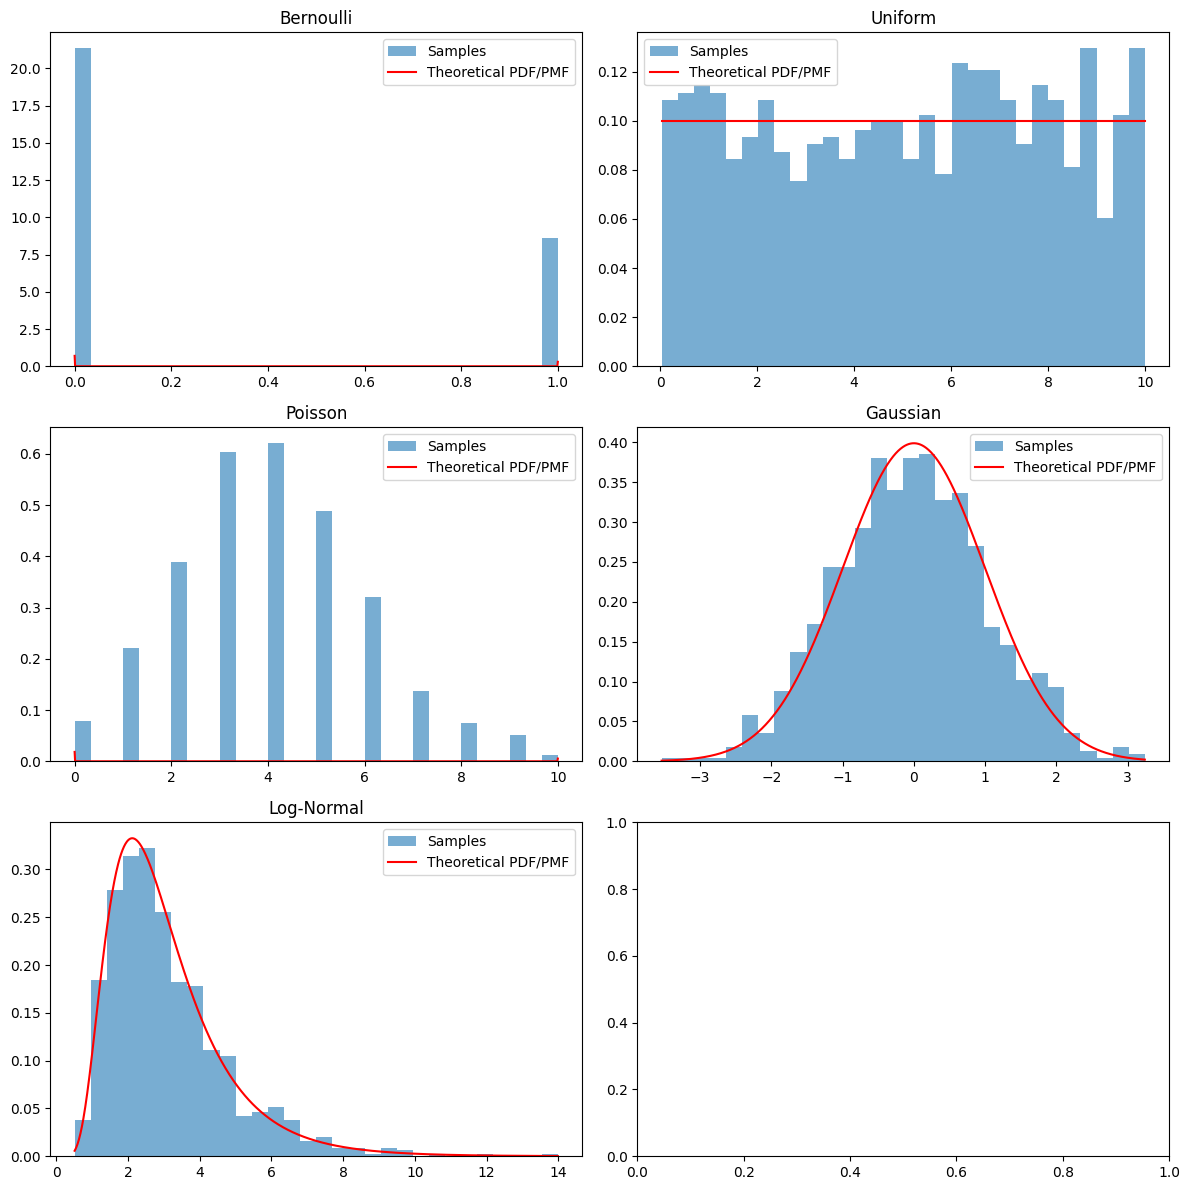

In [88]:

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define distributions
distributions = {
    "Bernoulli": {"dist": st.bernoulli, "params": {"p": 0.3}},
    "Uniform": {"dist": st.uniform, "params": {"loc": 0, "scale": 10}},
    "Poisson": {"dist": st.poisson, "params": {"mu": 4}},
    "Gaussian": {"dist": st.norm, "params": {"loc": 0, "scale": 1}},
    "Log-Normal": {"dist": st.lognorm, "params": {"s": 0.5, "scale": np.exp(1)}}
}

# Generate and plot distributions
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

for i, (name, info) in enumerate(distributions.items()):
    dist = info["dist"]
    params = info["params"]

    # Generate random samples
    samples = dist.rvs(**params, size=1000)

    # Histogram
    axes[i].hist(samples, bins=30, density=True, alpha=0.6, label="Samples")

    # Theoretical distribution
    x_vals = np.linspace(min(samples), max(samples), 1000)
    pdf_vals = dist.pdf(x_vals, **params) if hasattr(dist, "pdf") else dist.pmf(x_vals, **params)

    axes[i].plot(x_vals, pdf_vals, "r-", label="Theoretical PDF/PMF")
    axes[i].set_title(name)
    axes[i].legend()

plt.tight_layout()
plt.show()



## 1B. Noise in Signals

We will generate and analyze the following types of noise:

1. White Noise: Random frequencies that all have the same power
  S(f)=C
2. Brownian Noise: Cumulative sum of frequencies and is more powerful with lower frequencies.
  s(f)∝ 1/f^2

3. Pink Noise: lower frequencies have more power but is more balanced than Brownian Noise.
  s(f)∝ 1/f


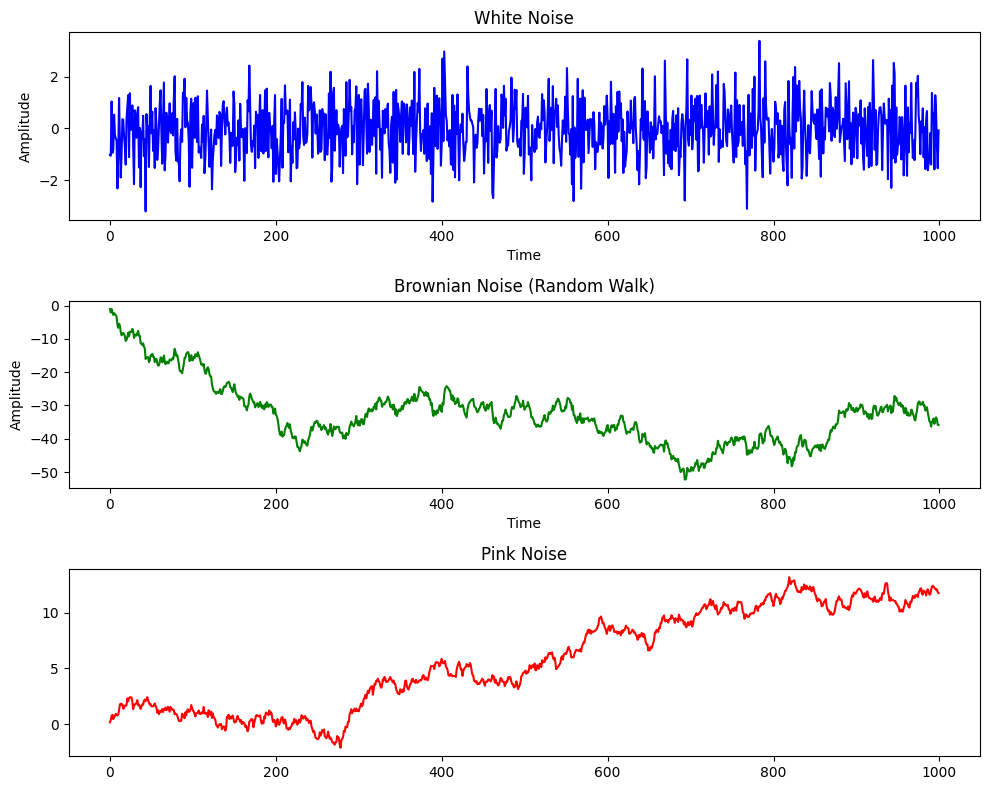

In [89]:

import scipy.signal as signal

# Generate White Noise
white_noise = np.random.normal(0, 1, 1000)

# Generate Brownian Noise
brownian_noise = np.cumsum(white_noise)

# Generate Pink Noise
def generate_pink_noise(n_samples):
    num_columns = 16
    array = np.random.randn(n_samples, num_columns)
    array[:, 1:] = np.cumsum(array[:, 1:], axis=0)
    return np.mean(array, axis=1)

pink_noise = generate_pink_noise(1000)

# Plot noise signals
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(white_noise, color="blue")
axes[0].set_title("White Noise")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Amplitude")

axes[1].plot(brownian_noise, color="green")
axes[1].set_title("Brownian Noise (Random Walk)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Amplitude")

axes[2].plot(pink_noise, color="red")
axes[2].set_title("Pink Noise")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()


***HW4 2B***
  (i) When would you use MAE over MSE as a loss function for a regression problem?
  - You would want to use MAE over MSE when you are wanting to not penalize outliers as much. Also when you are looking for the median of the distribution as MSE is better at finding the mean.
  (ii) What is the difference between Negative Log-Likelihood loss (NLL) and Cross Entropy loss (CE)?
  - Negative log-likihood expects inputs to be of log probabilities and allows you to manually use Logsoftmax. CE combines NLL and Logsoftmax into one step. So CE is an easier implementation and NLL should be used when you are needing more control over each step or when you are working with a model that outputs log probabilities.